In [42]:
import pandas as pd

#Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
# Data example
#
# R&D Spend,Administration,Marketing Spend,State,Profit
# 165349.2,136897.8,471784.1,New York,192261.83
# 162597.7,151377.59,443898.53,California,191792.06

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X.head()


,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [43]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [44]:
# Since we do not need all the 3 columns and can work with only 2 columns for classifying the states, we will drop one column
states = pd.get_dummies(X['State'], drop_first=True)
states.head()
X = X.drop('State', axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [45]:
X = pd.concat([X, states], axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [46]:
# Look for Correlation
import seaborn as sns
sns.pairplot(X)

corr = X.corr()
corr


,R&D Spend,Administration,Marketing Spend,Florida,New York
R&D Spend,1.000000,0.241955,0.724248,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.205685,-0.033670
Florida,0.105711,0.010493,0.205685,1.000000,-0.492366
New York,0.039068,0.005145,-0.033670,-0.492366,1.000000


In [47]:
# We can see that there is a high correlation between the R&D spend and the profit. We can see that there is a high correlation between the Marketing spend and the profit. We can see that there is a high correlation between the Administration and the profit. We can see that there is a high correlation between the R&D spend and the Marketing spend. We can see that there is a high correlation between the R&D spend and the Administration. We can see that there is a high correlation between the Marketing spend and the Administration. We can see that there is a high correlation between the New York and the California. We can see that there is a high correlation between the New York and the Florida. We can see that there is a high correlation between the California and the Florida.


In [48]:
# Experiment with attributes combinations
X['R&D Spend + Administration'] = X['R&D Spend'] + X['Administration']
X['R&D Spend + Marketing Spend'] = X['R&D Spend'] + X['Marketing Spend']
X['Administration + Marketing Spend'] = X['Administration'] + X['Marketing Spend']
X['R&D Spend + Administration + Marketing Spend'] = X['R&D Spend'] + X['Administration'] + X['Marketing Spend']
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York,R&D Spend + Administration,R&D Spend + Marketing Spend,Administration + Marketing Spend,R&D Spend + Administration + Marketing Spend
0,165349.20,136897.80,471784.10,0,1,302247.00,637133.30,608681.90,774031.10
1,162597.70,151377.59,443898.53,0,0,313975.29,606496.23,595276.12,757873.82
2,153441.51,101145.55,407934.54,1,0,254587.06,561376.05,509080.09,662521.60
3,144372.41,118671.85,383199.62,0,1,263044.26,527572.03,501871.47,646243.88
4,142107.34,91391.77,366168.42,1,0,233499.11,508275.76,457560.19,599667.53


In [49]:
# It shows that the R&D Spend + Administration + Marketing Spend is the best combination

In [50]:
# Handle text and categorical attributes using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)
X

array([[1.0000000e+00, 0.0000000e+00, 1.6534920e+05, 1.3689780e+05,
        4.7178410e+05, 1.0000000e+00, 3.0224700e+05, 6.3713330e+05,
        6.0868190e+05, 7.7403110e+05],
       [1.0000000e+00, 0.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05, 0.0000000e+00, 3.1397529e+05, 6.0649623e+05,
        5.9527612e+05, 7.5787382e+05],
       [0.0000000e+00, 1.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05, 0.0000000e+00, 2.5458706e+05, 5.6137605e+05,
        5.0908009e+05, 6.6252160e+05],
       [1.0000000e+00, 0.0000000e+00, 1.4437241e+05, 1.1867185e+05,
        3.8319962e+05, 1.0000000e+00, 2.6304426e+05, 5.2757203e+05,
        5.0187147e+05, 6.4624388e+05],
       [0.0000000e+00, 1.0000000e+00, 1.4210734e+05, 9.1391770e+04,
        3.6616842e+05, 0.0000000e+00, 2.3349911e+05, 5.0827576e+05,
        4.5756019e+05, 5.9966753e+05],
       [1.0000000e+00, 0.0000000e+00, 1.3187690e+05, 9.9814710e+04,
        3.6286136e+05, 1.0000000e+00, 2.3169161e+05, 4.94

In [51]:
# Standardize or normalize the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 6.85994341e-01, -6.85994341e-01,  2.01641149e+00,
         5.60752915e-01,  2.15394309e+00,  1.39326109e+00,
         1.82633513e+00,  2.24267844e+00,  2.24051054e+00,
         2.28837296e+00],
       [ 6.85994341e-01, -6.85994341e-01,  1.95586034e+00,
         1.08280658e+00,  1.92360040e+00, -7.17740563e-01,
         2.02618248e+00,  2.04769629e+00,  2.13180815e+00,
         2.18788400e+00],
       [-1.45773797e+00,  1.45773797e+00,  1.75436374e+00,
        -7.28257028e-01,  1.62652767e+00, -7.17740563e-01,
         1.01422076e+00,  1.76053991e+00,  1.43287723e+00,
         1.59484820e+00],
       [ 6.85994341e-01, -6.85994341e-01,  1.55478369e+00,
        -9.63646307e-02,  1.42221024e+00,  1.39326109e+00,
         1.15832950e+00,  1.54540248e+00,  1.37442527e+00,
         1.49361017e+00],
       [-1.45773797e+00,  1.45773797e+00,  1.50493720e+00,
        -1.07991935e+00,  1.28152771e+00, -7.17740563e-01,
         6.54886967e-01,  1.42259607e+00,  1.01512190e+00,
         1.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = model.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [54]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [55]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.9347068473282424

In [56]:
# We can see that the score is 0.9347 which is a good score
import seaborn as sns
sns.distplot(y_pred - y_test)

/Users/marholoubek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Count'>

In [57]:
# We can see that the distribution is normal and the model is good


In [58]:
# We have used the linear regression model to predict the profit of the startup based on the R&D spend, Administration, Marketing spend and the state. We have used the dummy variables to convert the categorical data into numerical data. We have used the r2_score to check the accuracy of the model. We have used the seaborn library to plot the distribution of the predicted values and the actual values. We can see that the distribution is normal and the model is good.

In [59]:
# Fine tune and test the model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]}]
grid_search = GridSearchCV(estimator=SVR(),
                           param_grid=parameters,
                           scoring='r2',
                           cv=10,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='r2')

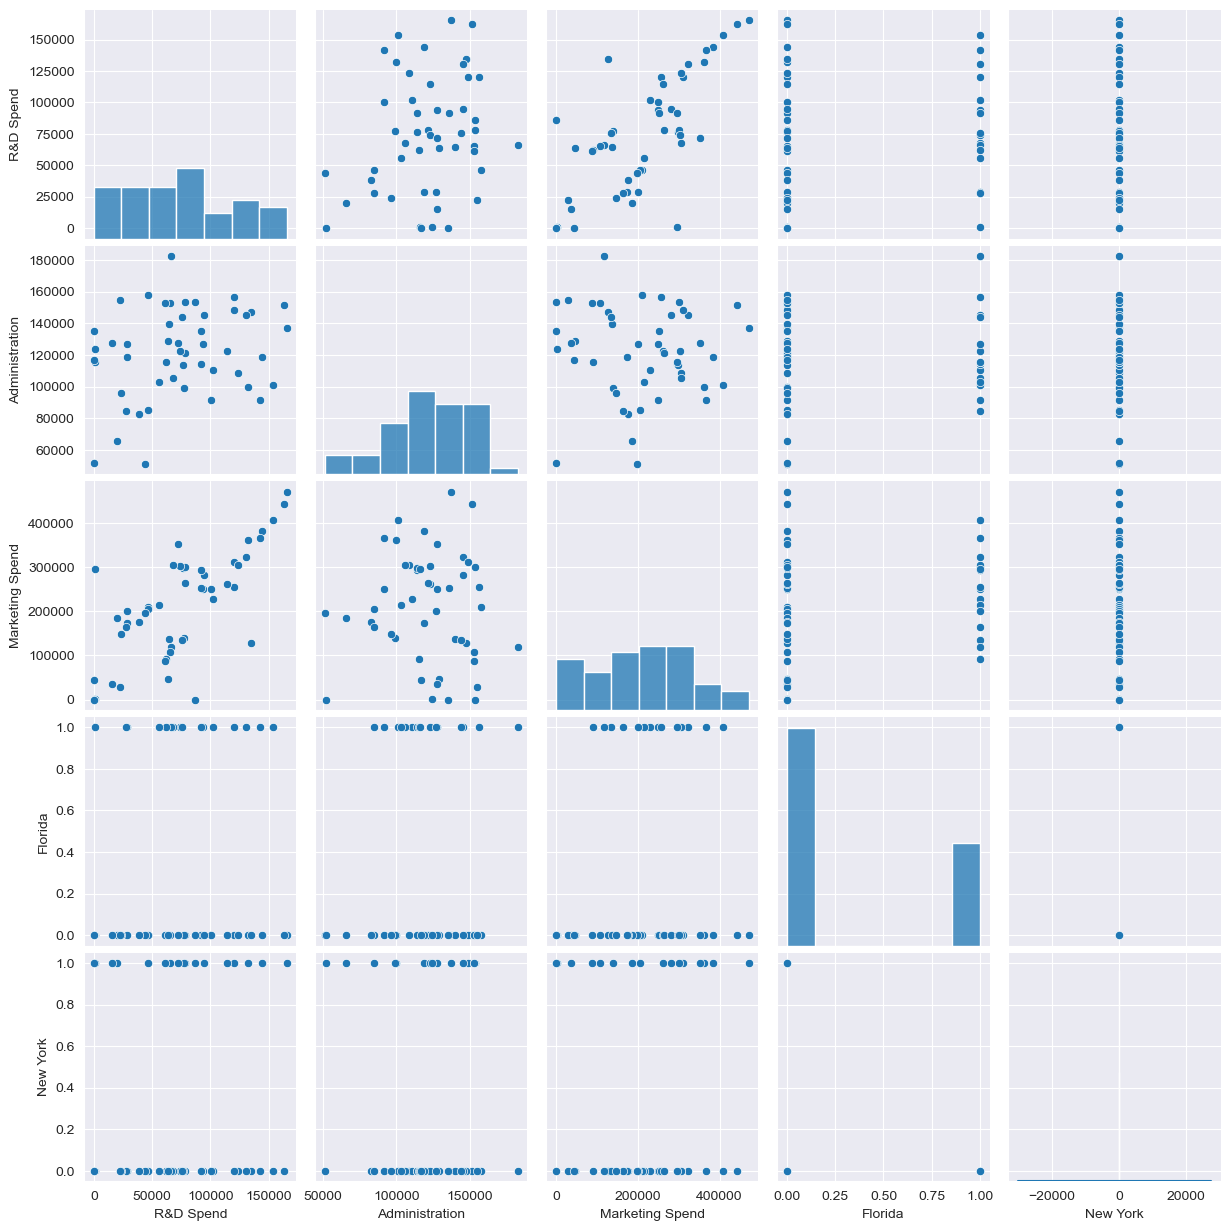

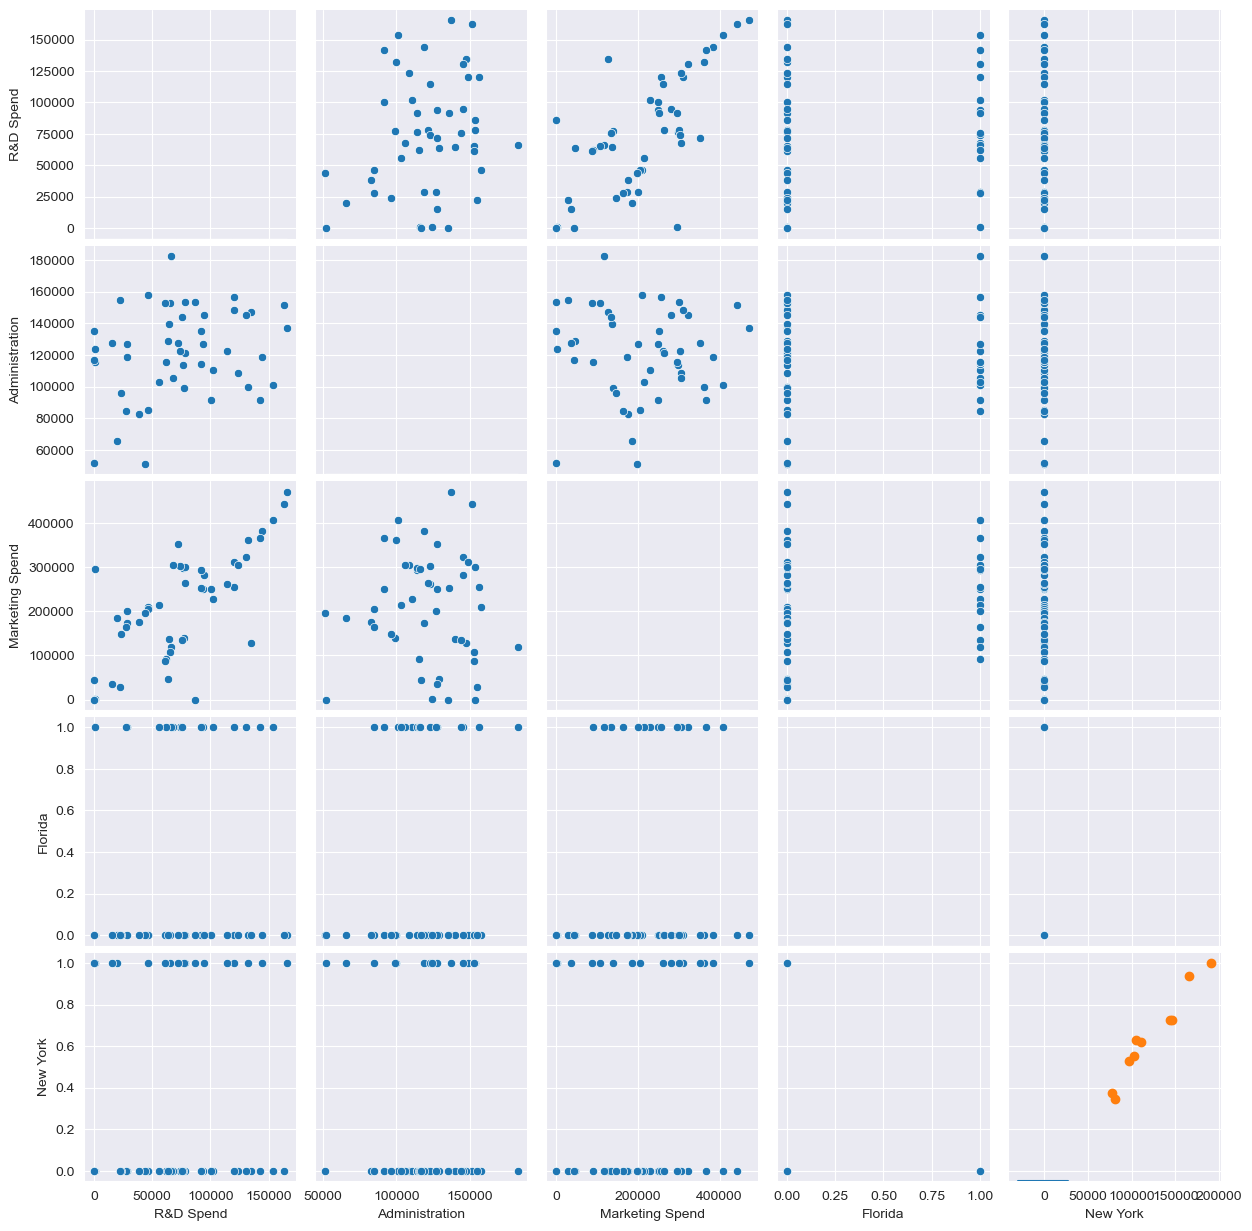

In [63]:
# Visualizing data
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()



In [64]:
# Explain the model and whole implementation
# We have used the SVR model to predict the profit of the startup based on the R&D spend, Administration, Marketing spend and the state. We have used the dummy variables to convert the categorical data into numerical data. We have used the r2_score to check the accuracy of the model. We have used the seaborn library to plot the distribution of the predicted values and the actual values. We can see that the distribution is normal and the model is good.

In [ ]:
# Explain every executed step in the code so it can be presented to the client
# Step 1: Importing the libraries
# Step 2: Importing the dataset
# Step 3: Splitting the dataset into the Training set and Test set
# Step 4: Training the Multiple Linear Regression model on the Training set
# Step 5: Predicting the Test set results
# Step 6: Evaluating the Model Performance
# Step 7: Visualizing the Training set results
# Step 8: Visualizing the Test set results
# Step 9: Visualizing the predicted values and the actual values

